# 

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engineering-student-journey/students.csv


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('/kaggle/input/engineering-student-journey/students.csv')

In [45]:
df.shape

(2000, 24)

In [46]:
df.duplicated().sum()
df.isnull().sum()

Student ID              1
Name                    0
Age                     1
Gender                  1
Branch                  1
Average GPA             1
Backlogs                1
Attendance (%)          1
Clubs                   1
Skills                  1
Internship Done         1
Internship Domain    1018
Placement Status        1
Placement Domain      968
CTC (LPA)               1
Alumni Path           968
Sem1 GPA                1
Sem2 GPA                1
Sem3 GPA                1
Sem4 GPA                1
Sem5 GPA                1
Sem6 GPA                1
Sem7 GPA                1
Sem8 GPA                1
dtype: int64

In [47]:
df['Internship Domain'].unique()

array(['Consulting', nan, 'Research', 'Higher Studies', 'Software',
       'Hardware', 'Core Engineering'], dtype=object)

In [48]:
df['Placement Domain'].unique()

array([nan, 'Core Engineering', 'Higher Studies', 'Research', 'Software',
       'Hardware', 'Consulting'], dtype=object)

In [49]:
dfbygpa = df.drop(['Internship Domain', 'Placement Domain','Alumni Path'], axis = 1)
dfbygpa.dropna(inplace = True)
dfbygpa.head()

,Student ID,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,...,Placement Status,CTC (LPA),Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
0,b37412a3-fa5c-40ca-b087-7109a47482d7,Amit,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",...,Not Placed,0.00,8.34,5.24,6.06,7.81,7.18,7.04,8.26,5.99
1,65001423-faeb-4d19-a550-8ea26133a34d,Tina Ballard,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",...,Not Placed,0.00,7.37,6.37,6.45,5.99,6.55,6.99,6.46,5.52
2,228aaf1d-8710-4c8d-bfec-001b0df01f34,Meena,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",...,Not Placed,0.00,5.79,8.82,7.03,6.92,7.67,6.01,7.75,6.62
3,1aa67474-e200-4157-ad54-c95aaa4d52a8,Christopher Morales,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",...,Placed,5.89,7.90,4.26,8.19,7.52,8.32,6.80,4.94,7.43
4,5122db4a-14c8-44d7-b2f4-e869f69d3dd7,Siddharth,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",...,Not Placed,0.00,6.86,6.24,7.64,7.15,5.91,6.18,8.19,8.54


In [50]:
dfbygpa.isnull().sum()

Student ID          0
Name                0
Age                 0
Gender              0
Branch              0
Average GPA         0
Backlogs            0
Attendance (%)      0
Clubs               0
Skills              0
Internship Done     0
Placement Status    0
CTC (LPA)           0
Sem1 GPA            0
Sem2 GPA            0
Sem3 GPA            0
Sem4 GPA            0
Sem5 GPA            0
Sem6 GPA            0
Sem7 GPA            0
Sem8 GPA            0
dtype: int64

In [51]:
dfbygpa.shape

(1999, 21)

In [52]:
dfbygpa['Placement Status'].unique()

array(['Not Placed', 'Placed'], dtype=object)

In [53]:
dfbygpa.describe()

,Age,Average GPA,Backlogs,Attendance (%),CTC (LPA),Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.00000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,20.474237,7.002616,0.966983,78.933147,5.795898,6.976433,7.08021,6.980905,6.961736,7.037894,6.939355,6.990310,7.054812
std,1.728062,0.341148,0.990905,11.730931,6.563695,0.966329,1.03160,0.985273,0.983697,0.984407,0.954357,1.018425,1.032945
min,18.000000,6.050000,0.000000,60.040000,0.000000,4.000000,4.10000,4.000000,4.000000,4.000000,4.150000,4.000000,4.000000
25%,19.000000,6.770000,0.000000,69.000000,0.000000,6.330000,6.39000,6.280000,6.275000,6.370000,6.270000,6.300000,6.355000
50%,21.000000,7.000000,1.000000,78.310000,3.460000,6.980000,7.09000,6.940000,6.910000,7.030000,6.930000,6.970000,7.110000
75%,22.000000,7.215000,1.000000,89.220000,11.260000,7.670000,7.82000,7.630000,7.640000,7.685000,7.575000,7.700000,7.765000
max,23.000000,8.070000,5.000000,99.980000,19.990000,10.000000,10.00000,10.000000,9.630000,9.780000,10.000000,9.920000,10.000000


In [54]:
dfbygpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student ID        1999 non-null   object 
 1   Name              1999 non-null   object 
 2   Age               1999 non-null   float64
 3   Gender            1999 non-null   object 
 4   Branch            1999 non-null   object 
 5   Average GPA       1999 non-null   float64
 6   Backlogs          1999 non-null   float64
 7   Attendance (%)    1999 non-null   float64
 8   Clubs             1999 non-null   object 
 9   Skills            1999 non-null   object 
 10  Internship Done   1999 non-null   object 
 11  Placement Status  1999 non-null   object 
 12  CTC (LPA)         1999 non-null   float64
 13  Sem1 GPA          1999 non-null   float64
 14  Sem2 GPA          1999 non-null   float64
 15  Sem3 GPA          1999 non-null   float64
 16  Sem4 GPA          1999 non-null   float64
 17  

In [55]:
dfbygpa = dfbygpa.iloc[:,:12]
dfbygpa.head()

,Student ID,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,Internship Done,Placement Status
0,b37412a3-fa5c-40ca-b087-7109a47482d7,Amit,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",Yes,Not Placed
1,65001423-faeb-4d19-a550-8ea26133a34d,Tina Ballard,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",No,Not Placed
2,228aaf1d-8710-4c8d-bfec-001b0df01f34,Meena,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",Yes,Not Placed
3,1aa67474-e200-4157-ad54-c95aaa4d52a8,Christopher Morales,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",No,Placed
4,5122db4a-14c8-44d7-b2f4-e869f69d3dd7,Siddharth,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",Yes,Not Placed


In [56]:
dfbygpa = dfbygpa.drop(['Student ID'], axis = 1)
dfbygpa.shape

(1999, 11)

In [57]:
placed = dfbygpa[dfbygpa['Placement Status']== 'Placed']
placed.shape

(1032, 11)

In [58]:
dfbygpa['Placement Status'] = dfbygpa['Placement Status'].map({'Placed': 1, 'Not Placed':0})
dfbygpa.head()

,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,Internship Done,Placement Status
0,Amit,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",Yes,0
1,Tina Ballard,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",No,0
2,Meena,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",Yes,0
3,Christopher Morales,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",No,1
4,Siddharth,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",Yes,0


In [59]:
dfbygpa['Internship Done'] = dfbygpa['Internship Done'].map({'Yes': 1, 'No':0})


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Average GPA', ylabel='Count'>

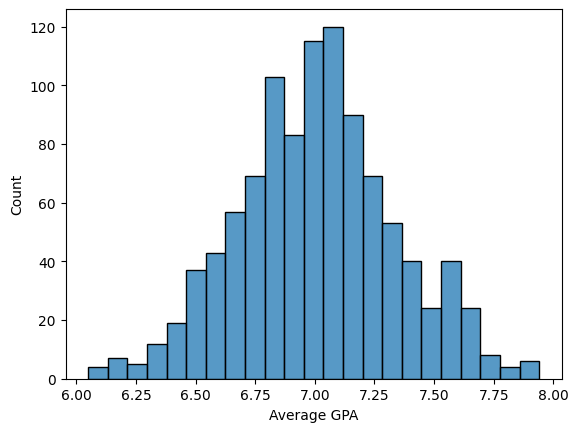

In [60]:
sns.histplot(placed['Average GPA'])

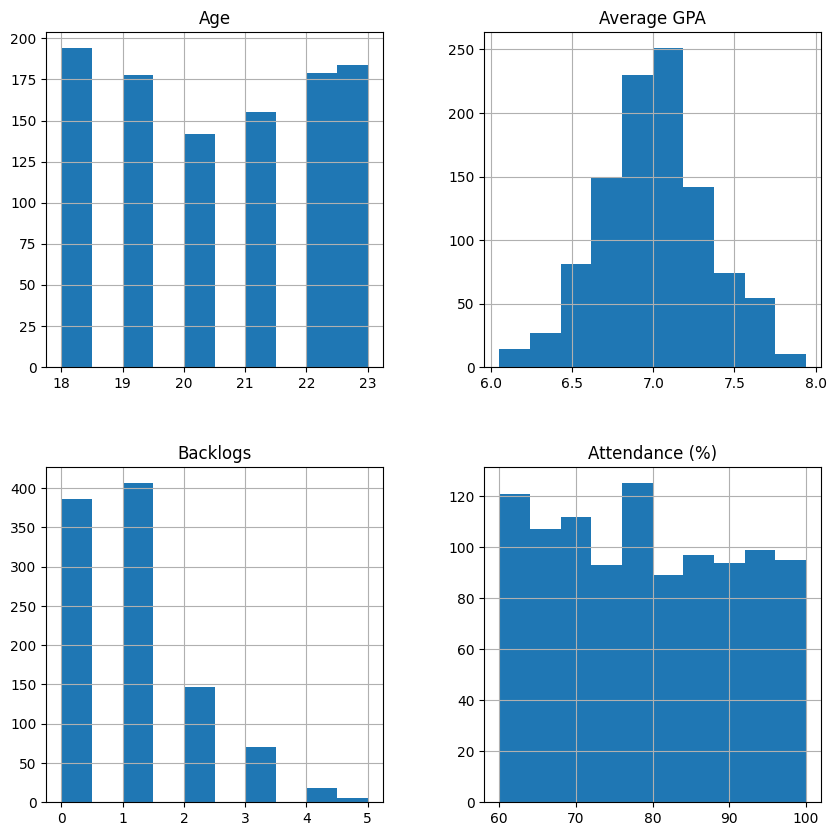

In [61]:
placed.hist(figsize = (10,10))
plt.show()


In [62]:
batch = dfbygpa.iloc[:,3:]
batch.head()

,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,Internship Done,Placement Status
0,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",1,0
1,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",0,0
2,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",1,0
3,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",0,1
4,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",1,0


In [63]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
encoder = LabelEncoder()
scaler = StandardScaler()
mbl = MultiLabelBinarizer()

In [64]:
batch['Clubs'] = mbl.fit_transform(batch['Clubs'])
batch['Skills'] = mbl.fit_transform(batch['Skills'])

In [65]:
batch['Branch'].unique()

array(['MECH', 'ECE', 'CIVIL', 'EEE', 'IT', 'CSE'], dtype=object)

In [80]:
batch['Branch'] = encoder.fit_transform(batch['Branch'])
batch.head

<bound method NDFrame.head of       Branch  Average GPA  Backlogs  Attendance (%)  Clubs  Skills  \
0          5         6.99       0.0           70.45      1       1   
1          2         6.46       0.0           65.45      1       1   
2          0         7.08       0.0           84.79      1       1   
3          2         6.92       2.0           62.26      1       1   
4          3         7.09       0.0           97.12      0       1   
...      ...          ...       ...             ...    ...     ...   
1995       4         7.69       2.0           92.45      1       1   
1996       0         7.25       0.0           96.35      1       1   
1997       3         6.92       0.0           75.32      1       1   
1998       1         7.09       0.0           94.20      1       1   
1999       4         6.52       0.0           60.28      0       1   

      Internship Done  Placement Status  
0                   1                 0  
1                   0                 0  
2  

In [67]:
x = batch.iloc[:,:-1]
y = batch.iloc[:,-1]
print(x.shape)
print(y.shape)

(1999, 7)
(1999,)


In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42 )

In [69]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)


LogisticRegression()

In [70]:
y_pred = logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(logmodel.score(x_test,y_test))

[[ 81 101]
 [101 117]]
0.495


In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_tree_pred = dtree.predict(x_test)

In [72]:
cm2 = confusion_matrix(y_test,y_tree_pred)
print(cm2)
print(dtree.score(x_test,y_test))

[[156  26]
 [ 37 181]]
0.8425


In [73]:
# Basic Trio for Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_tree_pred,y_test)
precision = precision_score(y_tree_pred,y_test)
recall = recall_score(y_tree_pred,y_test)
print(f"accuracy is {accuracy}, precsion is {precision}, recall is {recall}")

accuracy is 0.8425, precsion is 0.8302752293577982, recall is 0.8743961352657005


In [74]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='precision')  
grid.fit(x_train, y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [75]:
params = {
    'max_depth': [3, 5, 7, 10, 'None'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2],
    'max_leaf_nodes': [10, 20, 50, 'None']
}

grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=params,
    cv=5,
    scoring='f1', 
)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Train Score:", grid_search.best_estimator_.score(x_train, y_train))
print("Test Score:", grid_search.best_estimator_.score(x_test, y_test))

Best Parameters: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Score: 0.5465916197623515
Test Score: 0.51


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 600, in _valid

In [76]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
print("RF Test Score:", model.score(x_test, y_test))


RF Test Score: 0.8425


In [77]:
y_rfc = model.predict(x_test)
cm3 = confusion_matrix(y_test,y_rfc)
print(cm3)

[[159  23]
 [ 40 178]]


In [78]:
accuracy2 = accuracy_score(y_rfc,y_test)
precision2 = precision_score(y_rfc,y_test)
recall2 = recall_score(y_rfc,y_test)
print(f"accuracy is {accuracy2}, precsion is {precision2}, recall is {recall2}")

accuracy is 0.8425, precsion is 0.8165137614678899, recall is 0.8855721393034826


In [79]:
##Since the dataset have ony thousands of samples so we can say that we can go forward with this model. The random classifier model has found to be better model than Decision Tree Classifier due to higher recall score.